In [1]:
import mglearn
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False

### 계층적 군집분석

In [2]:
from sklearn.cluster import AgglomerativeClustering

In [3]:
x, y= make_blobs(random_state= 1)

agg= AgglomerativeClustering(n_clusters= 3)
assignment= agg.fit_predict(x)

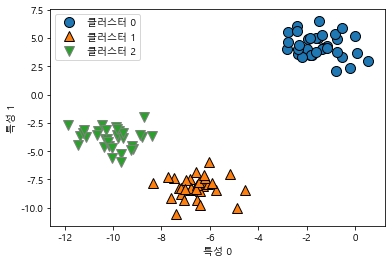

In [4]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], assignment)
plt.legend(['클러스터 0', '클러스터 1','클러스터 2'], loc= 'best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

In [5]:
from scipy.cluster.hierarchy import dendrogram, ward

Text(0, 0.5, 'cluster 거리')

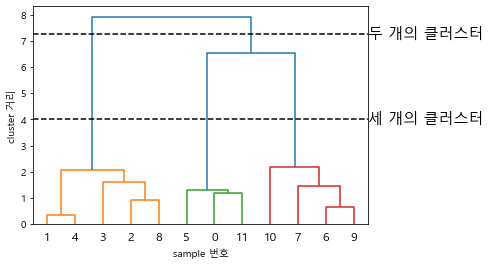

In [6]:
x, y= make_blobs(random_state= 0, n_samples= 12)

# 데이터 배열 x에 ward 함수를 적용
# 거리 정보가 담긴 배열을 리턴
linkage_array= ward(x)
# 클러스터간에 거리 정보가 담긴 linkage_array를 사용하여 덴드로그램으로 표현
dendrogram(linkage_array)

# 두 개 or 세 개의 클러스터로 구분 -> 라인 표시로 구분
ax= plt.gca()
bounds= ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c= 'k')
ax.plot(bounds, [4, 4], '--', c= 'k')

ax.text(bounds[1], 7.25, '두 개의 클러스터', va= 'center',
        fontdict= {'size': 15})
ax.text(bounds[1], 4, '세 개의 클러스터', va= 'center',
       fontdict= {'size': 15})
plt.xlabel('sample 번호')
plt.ylabel('cluster 거리')

### DBSCAN

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
x, y= make_blobs(random_state= 1, n_samples= 12)

cluster= DBSCAN().fit_predict(x)

print('클러스터 레이블: \n', cluster)
x, y= make_moons(n_samples= 200, noise= 0.05, random_state= 0)


클러스터 레이블: 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [9]:
# 스케일링
# 학습
# 변환
x_scaled= StandardScaler().fit_transform(x)

# dbscan
# 학습 및 변환
clusters= DBSCAN().fit_predict(x_scaled)

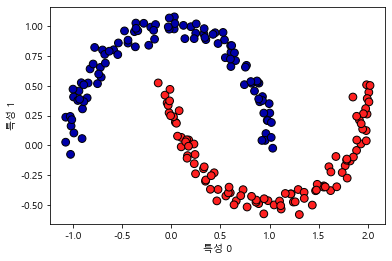

In [10]:
plt.scatter(x[:, 0], x[:, 1], c= clusters, cmap= mglearn.cm2,
                     s=60, edgecolors= 'black')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()